## Pandas

In [58]:
import pandas as pd

### pd.Series

`pd.Series` — это аналог массива `np.ndarray`, но в качестве индекса можно использовать любые объекты.
Так же как и `np.ndarray` поддерживает векторизированные операции

In [60]:
s1 = pd.Series(range(10))
s2 = pd.Series(range(10, 20))
s1 + s2

0    10
1    12
2    14
3    16
4    18
5    20
6    22
7    24
8    26
9    28
dtype: int64

#### Нечисловой индекс

In [62]:
s3 = pd.Series({'x': 132, 'y': 456})
s4 = pd.Series({'z': 100, 'x': -100})

s3 * s4

x   -13200.0
y        NaN
z        NaN
dtype: float64

#### Типы данных
- `str`
- `float` различных размеров
- `int` различных размеров
- `bool`
- `categorical`

In [83]:
converted

0         BMW
1         BMW
2       Volvo
3    Mercedes
dtype: category
Categories (3, object): ['BMW', 'Volvo', 'Mercedes']

In [84]:
marks = pd.CategoricalDtype(['BMW', 'Volvo', 'Mercedes'])
autos = pd.Series(['BMW', 'BMW', 'Volvo', 'Mercedes'] * 10)
converted = autos.astype(marks)

print(autos.memory_usage())
print(converted.memory_usage())

448
300


#### Операции для работы со строками
Доступны через `pd.Series.str`, эффективно реализованы, в том числе регулярные вырожеения

In [96]:
sentences = pd.Series([
    'Маша мыла раму',
    'Проезд стоит 33 рубля',
    'Просто какой-то достаточно длинный текст на руксском языке',
])

print('Длины текстов')
print(sentences.str.len())

print('Тексты в нижнем регистре')
print(sentences.str.lower())

print('Взять первое слово')
print(sentences.str.split().str[0])

print('Взять начало текста')
print(sentences.str[:10])

print('Замена по регулряному вырожению')
print(sentences.str.replace('(\d)+', '[NUMBER]', regex=True))

Длины текстов
0    14
1    21
2    58
dtype: int64
Тексты в нижнем регистре
0                                       маша мыла раму
1                                проезд стоит 33 рубля
2    просто какой-то достаточно длинный текст на ру...
dtype: object
Взять первое слово
0      Маша
1    Проезд
2    Просто
dtype: object
Взять начало текста
0    Маша мыла 
1    Проезд сто
2    Просто как
dtype: object
Замена по регулряному вырожению
0                                       Маша мыла раму
1                          Проезд стоит [NUMBER] рубля
2    Просто какой-то достаточно длинный текст на ру...
dtype: object


### pd.DataFrame

`pd.DataFrame` представляет собой таблицу, различные столбцы которой могут иметь различные типы данных.
Каждая колонка и каждлая строка представляет собой `pd.Series`

In [85]:
df = pd.DataFrame({
    'age': [23, 30, 23],
    'car': ['Volvo', 'BMW', 'Mercedes'],
    'married': [True, False, True],
})

#### Базовые методы
Одинаковые для `pd.Series` и `pd.DataFrame`, однако, для `pd.DataFrame` можно указывать вдоль какой оси сделать (если требуется).

- `min`
- `max`
- `sum`
- `cumsum`
- `head`
- `describe`
- `sample`
- `isnull`
- `replace` — позволяет заменить по словарю, другому `pd.Series`
- `map`

### Input/Output
Поддерживает популярные форматы:
- CSV
- JSON
- Excel
- [Apache Parquet](https://parquet.apache.org/)


Функции `pd.read_{FORMAT}` и `pd.DataFrame.to_{FORMAT}`

### Индексация
- `.loc` - обращение по ключу. Можно передать несколько индексов, тогда будет выбраны строка и столбец
- `.iloc` - обращение по номеру элемента (зависит от того, в каком порядке лежат элементы, может быть нестабильным)
- `[]` - выбрать колонку


Так же можно выбирать по булевой маске или срезы


#### Multiindex
Элементом индекса может быть кортеж. В этом случае можно делать срезы только по первой компоненте, например.


#### Работа с индексом
- `.set_index` - устанвовить индексом аргмуент (например, можно передать имя колонки)
- `.reset_index` - сбросить индекс и занумеровать числами от 0 до числа строк
- `.sort_index` - расположить строки в порядке индекса

### Группировка и агрегаты
У рядов и таблиц есть методы, которые позволяют вычислять агргеаты: сумму, среднее, минимум, максимум, ...

Но часто нужно посчитать статистику внутри какой-либо группу, для этого можно сгруппировать ряд или таблицу

### [Adult](https://archive.ics.uci.edu/dataset/2/adult)

Датасет, содержащий 32561 запись о жителях США. Собран в 1994 году.

**Цель**: предсказать будет ли заработок превышать 50000$ или нет

In [55]:
columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'target',
]


adult = pd.read_csv('../../data/adult/adult.data', header=None)
adult.columns = columns

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [134]:
adult.loc[3:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,binary_target
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


In [137]:
adult.loc[:, 'age':'education']

,age,workclass,fnlwgt,education
0,39,State-gov,77516,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors
2,38,Private,215646,HS-grad
3,53,Private,234721,11th
4,28,Private,338409,Bachelors
...,...,...,...,...
32556,27,Private,257302,Assoc-acdm
32557,40,Private,154374,HS-grad
32558,58,Private,151910,HS-grad
32559,22,Private,201490,HS-grad


In [97]:
adult['target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [98]:
adult['binary_target'] = adult['target'].replace({' <=50K': 0, ' >50K': 1})

In [104]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,binary_target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [105]:
adult['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [141]:
grouped = adult.groupby(['sex', 'workclass']).agg({
    'binary_target': ['count', 'mean'],
    'age': ['median'],
})

grouped.head()

binary_target              age
                              count      mean median
sex     workclass                                   
 Female  ?                      839  0.061979   29.0
         Federal-gov            315  0.177778   41.0
         Local-gov              835  0.184431   42.0
         Never-worked             2  0.000000   24.0
         Private               7752  0.093653   33.0

In [166]:
grouped.loc[' Female': (' Male', ' Federal-gov')]

binary_target              age
                                  count      mean median
sex     workclass                                       
 Female  ?                          839  0.061979   29.0
         Federal-gov                315  0.177778   41.0
         Local-gov                  835  0.184431   42.0
         Never-worked                 2  0.000000   24.0
         Private                   7752  0.093653   33.0
         Self-emp-inc               135  0.303704   45.0
         Self-emp-not-inc           399  0.205514   43.0
         State-gov                  489  0.139059   38.0
         Without-pay                  5  0.000000   62.0
 Male    ?                          997  0.139418   47.0
         Federal-gov                645  0.488372   43.0

## Визуализация

### Почему визуализация важна?
Квартет Энскомба

In [48]:
import pandas as pd


anscombe = pd.read_csv('../../data/anscombe_quartet.csv')
anscombe.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [17]:
anscombe.agg(['mean', 'std'])

,x1,y1,x2,y2,x3,y3,x4,y4
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579


In [25]:
anscombe_corr = anscombe.corr()
for i in range(1, 5):
    corr = anscombe_corr.loc[(f'x{i}', f'y{i}')]
    print(f'corr(x{i},y{i})={corr}')

corr(x1,y1)=0.8164205163448399
corr(x2,y2)=0.8162365060002427
corr(x3,y3)=0.8162867394895984
corr(x4,y4)=0.8165214368885028


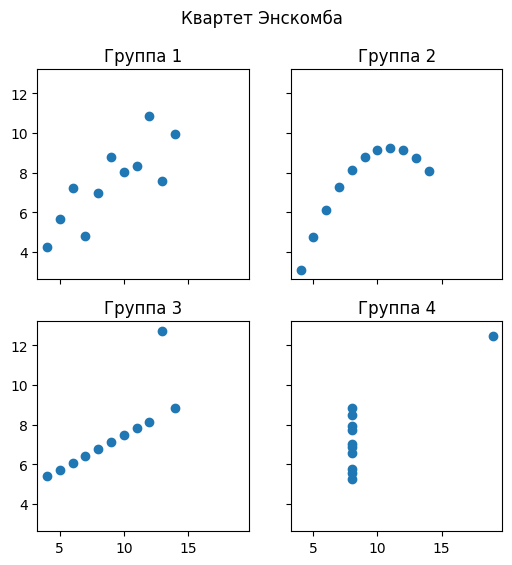

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


n_groups = 4
row_size = 2
fig, axes = plt.subplots(
    n_groups // row_size,
    row_size,
    figsize=(6, 6),
    sharex=True,
    sharey=True,
)
for i in range(1, 5):
    row = (i - 1) // row_size
    column = (i - 1) % row_size
    ax = axes[row][column]
    x = anscombe[f'x{i}']
    y = anscombe[f'y{i}']
    ax.scatter(x, y)
    ax.set_title(f'Группа {i}')

fig.suptitle('Квартет Энскомба')
plt.subplots_adjust()

### Библиотеки для визуализации
* [Matplotlib](https://matplotlib.org/) — одна из первых библиотек, до сих пор широко используется. Канонически импортируется как 
    ```python
    import matloblib.pyplot as plt
    ```
    
* [Seaborn](https://seaborn.pydata.org/) — надстройка на matplotlib, упрощает многие рутинные операции.
Канонически импортируется как 
```python
import seaborn as sns
```

* [Bokeh](https://bokeh.org/) - библиотека, позволяющая стороить интерактивные графики и виджеты

* [Plotly](https://plotly.com/graphing-libraries/) — библиотека с упором на интерактивность

### Типы графиков

#### Гистограмма

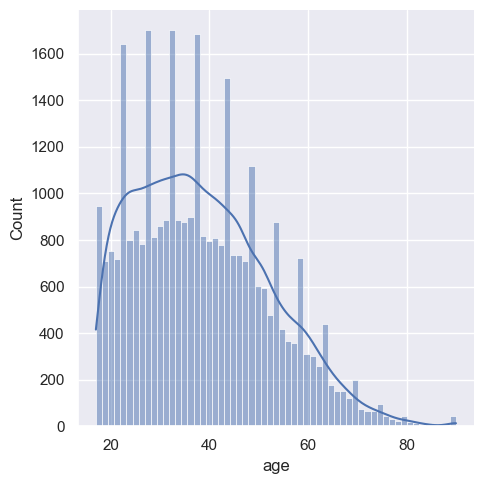

In [116]:
import seaborn as sns
sns.set()
sns.displot(adult['age'], kde=True)

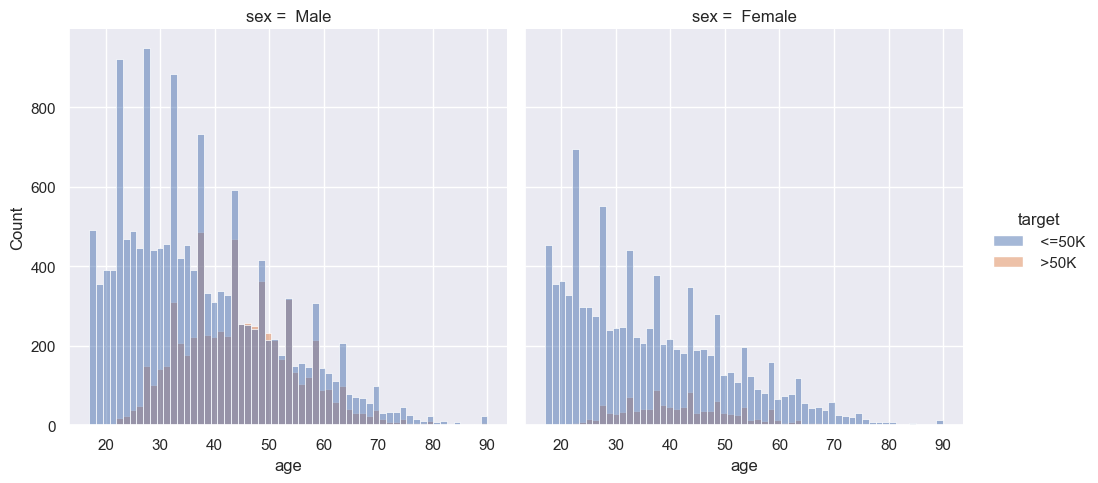

In [129]:
sns.displot(
    data=adult,
    x='age',
    col='sex',
    hue='target',
)

#### Точечные графики (диаграммы рассеивания)

<AxesSubplot: xlabel='age', ylabel='capital-gain'>

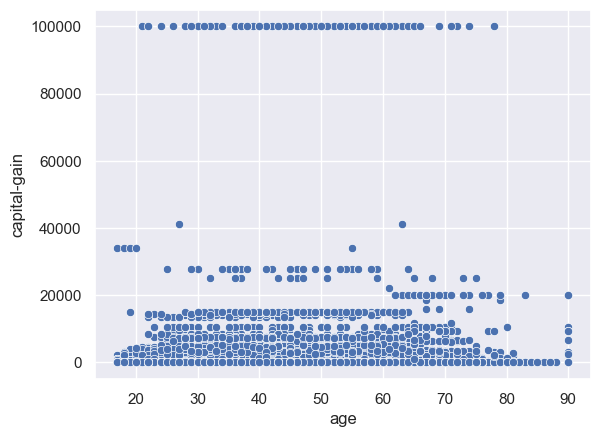

In [123]:
sns.scatterplot(
    data=adult,
    x='age',
    y='capital-gain',
)

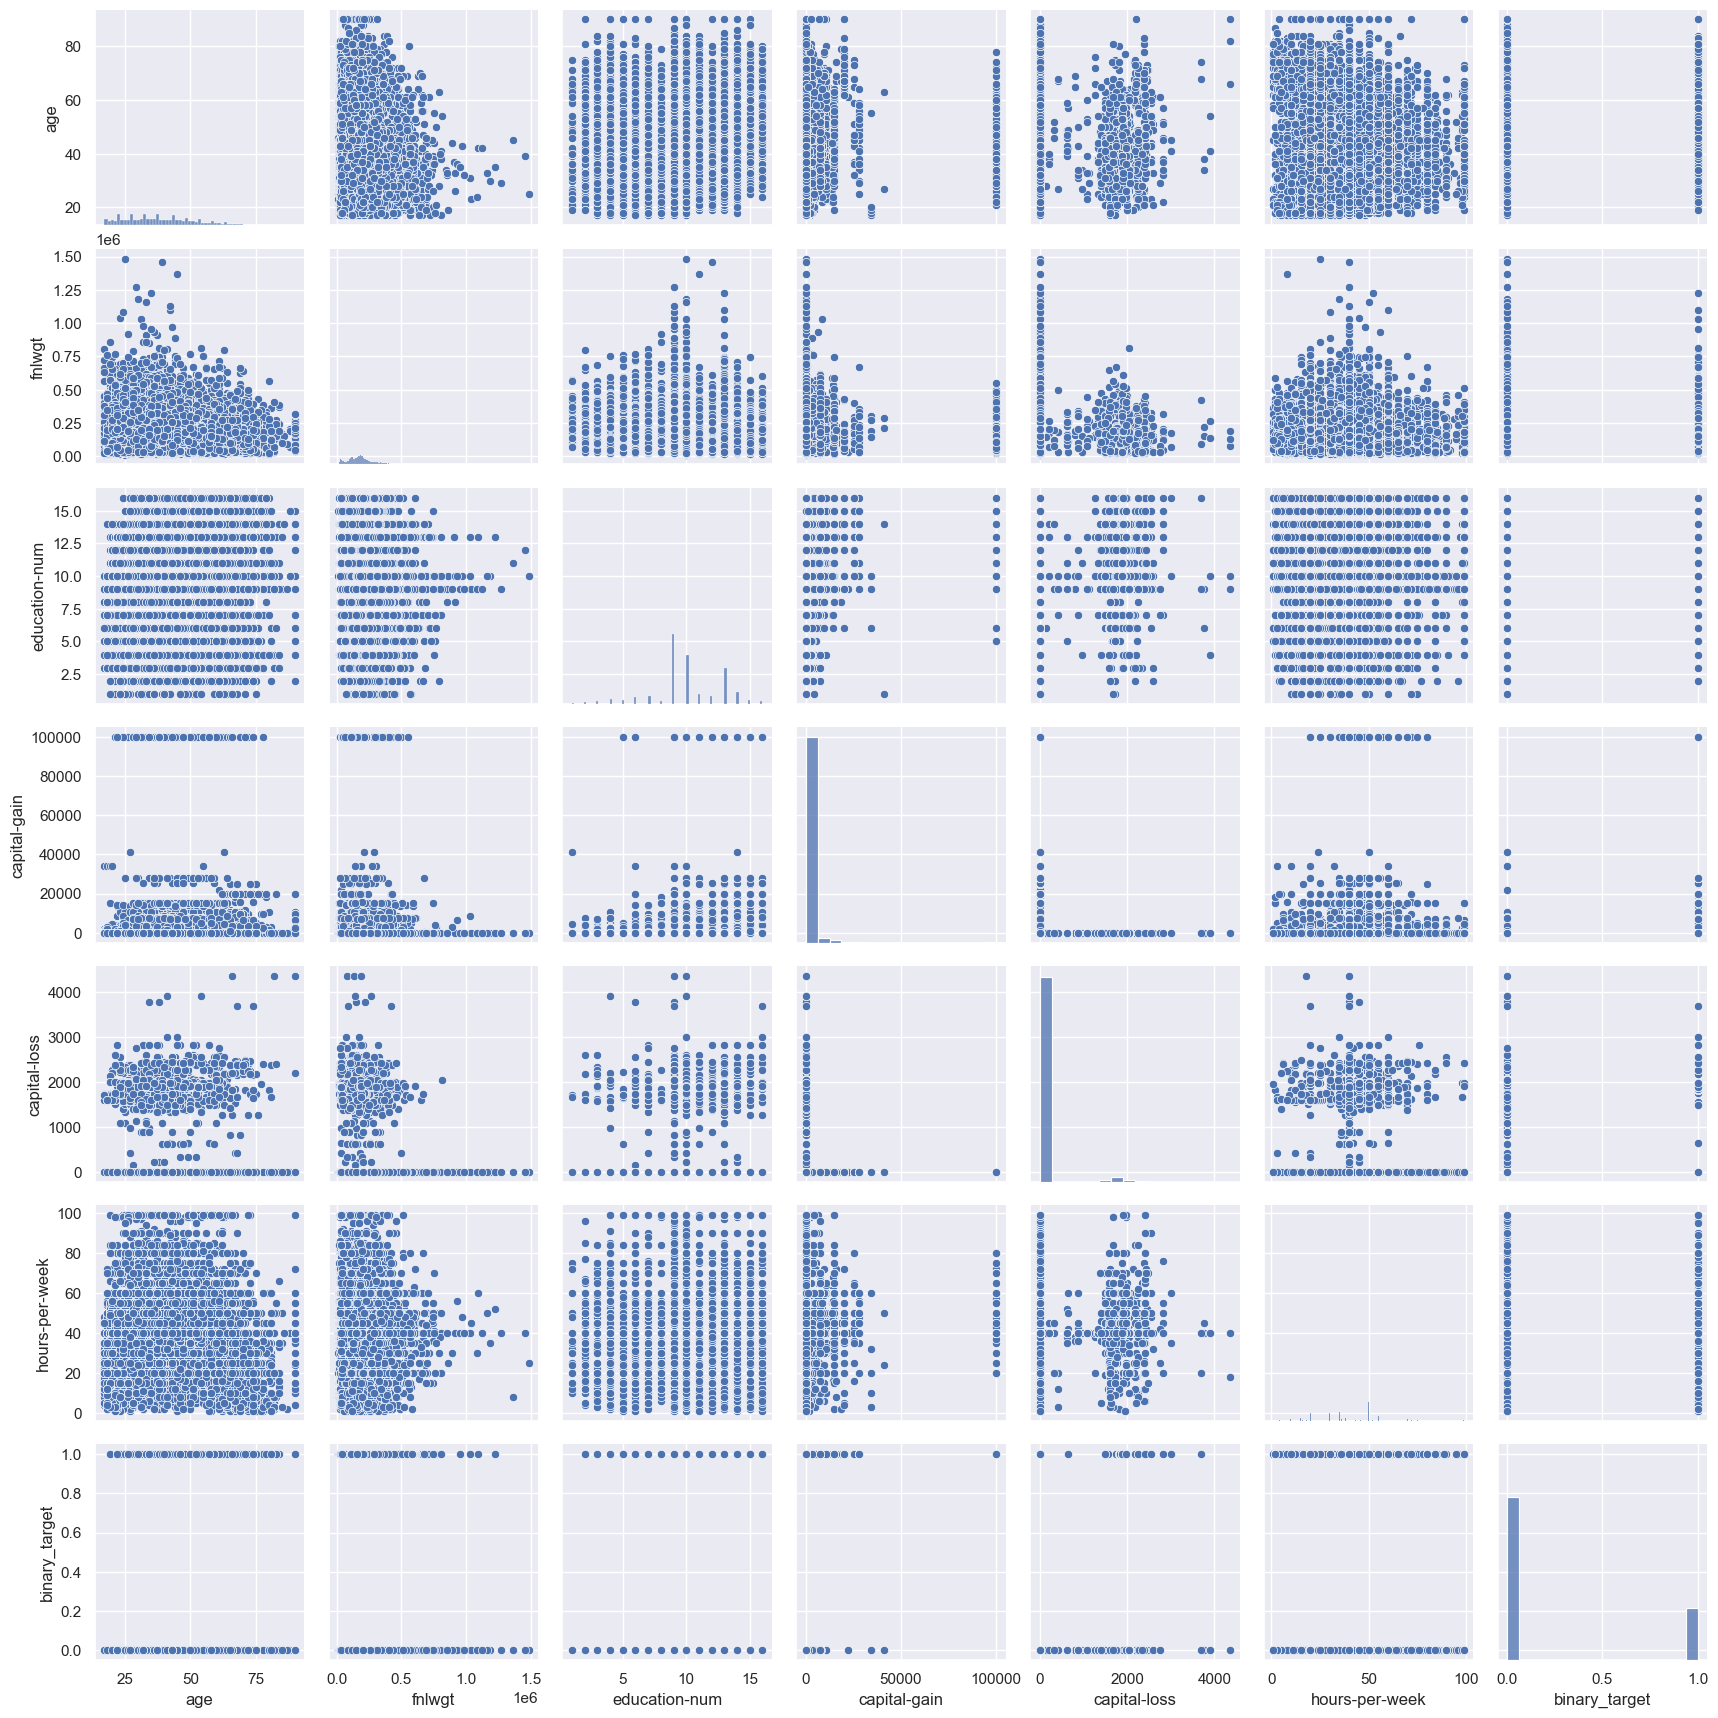

In [128]:
sns.pairplot(adult)

#### Ящичные диограмым (box-plot)

<AxesSubplot: xlabel='education-num', ylabel='age'>

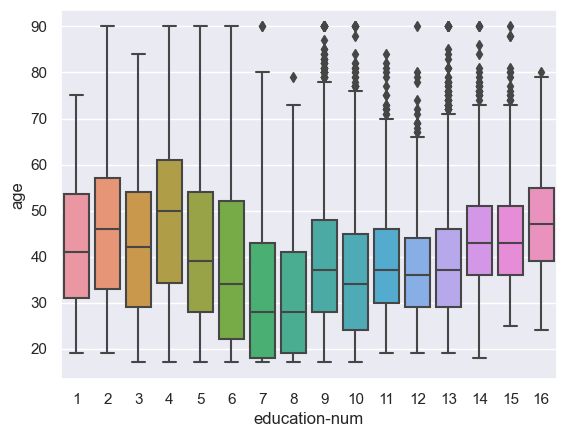

In [131]:
sns.boxplot(
    data=adult,
    x='education-num',
    y='age',
)

<AxesSubplot: xlabel='education-num', ylabel='age'>

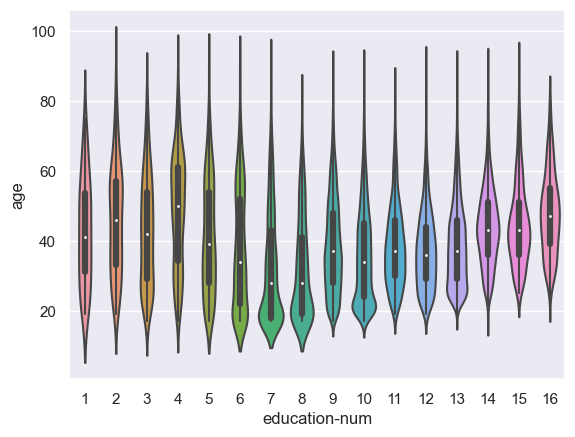

In [132]:
sns.violinplot(
    data=adult,
    x='education-num',
    y='age',
)

In [168]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target', 'binary_target'],
      dtype='object')

In [174]:
adult.pivot_table(values=['binary_target'], index=['sex', 'education'], aggfunc='mean')

binary_target
sex     education                   
 Female  10th               0.010169
         11th               0.018519
         12th               0.027778
         1st-4th            0.000000
         5th-6th            0.023810
         7th-8th            0.006250
         9th                0.034722
         Assoc-acdm         0.133017
         Assoc-voc          0.134000
         Bachelors          0.209389
         Doctorate          0.581395
         HS-grad            0.066667
         Masters            0.333955
         Preschool          0.000000
         Prof-school        0.456522
         Some-college       0.070207
 Male    10th               0.092476
         11th               0.069987
         12th               0.100346
         1st-4th            0.049180
         5th-6th            0.056225
         7th-8th            0.080247
         9th                0.059459
         Assoc-acdm         0.323529
         Assoc-voc          0.333333
         Bachelors          0.503747
         Doctorate          0.782875
         HS-grad            0.203769
         Masters            0.657119
         Preschool          0.000000
         Prof-school        0.787190
         Some-college       0.265329

### Ссылки
1. [Сборник](https://github.com/HorusHeresyHeretic/Pandas_Practice) тетрадок по Pandas
1. [Еще тетрадки по pandas](https://github.com/jupyter/jupyter/wiki#a-gallery-of-interesting-jupyter-notebooks)
1. [Pandas для больших данных](https://habr.com/ru/companies/ruvds/articles/442516/) 
